### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than $12500, $12500 - $24999, $25000 - $37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than $20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/coupons.csv')

## Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [4]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [5]:
data.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
8589,No Urgent Place,Friend(s),Snowy,30,10AM,Carry out & Take away,1d,Female,21,Unmarried partner,...,1~3,less1,1~3,never,1,1,0,0,1,1
2542,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,26,Single,...,4~8,4~8,4~8,less1,1,0,0,0,1,1
6817,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Unmarried partner,...,less1,1~3,4~8,less1,1,1,1,0,1,0
2555,Work,Alone,Sunny,55,7AM,Bar,1d,Female,26,Single,...,4~8,4~8,4~8,less1,1,1,1,0,1,1
4933,Home,Alone,Sunny,80,10PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,less1,1~3,never,1,0,0,1,0,1
6422,Home,Alone,Sunny,80,10PM,Restaurant(<20),2h,Male,26,Married partner,...,gt8,4~8,gt8,1~3,1,0,0,1,0,1
9342,No Urgent Place,Alone,Sunny,30,10AM,Carry out & Take away,1d,Female,50plus,Single,...,never,less1,never,never,1,1,0,0,1,1
1855,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,never,less1,4~8,never,1,0,0,0,1,1
10417,Home,Alone,Sunny,80,10PM,Restaurant(20-50),1d,Female,26,Unmarried partner,...,never,1~3,less1,never,1,1,0,0,1,0
11116,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,21,Single,...,4~8,4~8,4~8,never,1,0,0,1,0,1


In [6]:
# Inspect dataset for missing or null data
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

2. Investigate the dataset for missing or problematic data.

In [7]:
data['Bar'].value_counts(dropna=False)

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
NaN       107
Name: count, dtype: int64

In [8]:
data['CoffeeHouse'].value_counts(dropna=False)


CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
NaN       217
Name: count, dtype: int64

In [9]:
data['CarryAway'].value_counts(dropna=False)

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
NaN       151
Name: count, dtype: int64

In [10]:
data['RestaurantLessThan20'].value_counts(dropna=False)

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
NaN       130
Name: count, dtype: int64

In [11]:
data['Restaurant20To50'].value_counts(dropna=False)

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
NaN       189
Name: count, dtype: int64

In [12]:
# show all unique values in the column 'car'
data['car'].value_counts(dropna=False)

car
NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [13]:
# The 'car' column has over 99% missing values and the values that were there are not super useful.
# Drop 'car' column
data = data.drop(columns=['car'])

4. What proportion of the total observations chose to accept the coupon? 



In [14]:
# % of unique values in 'Y' column
data['Y'].value_counts(normalize=True)

Y
1    0.568433
0    0.431567
Name: proportion, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

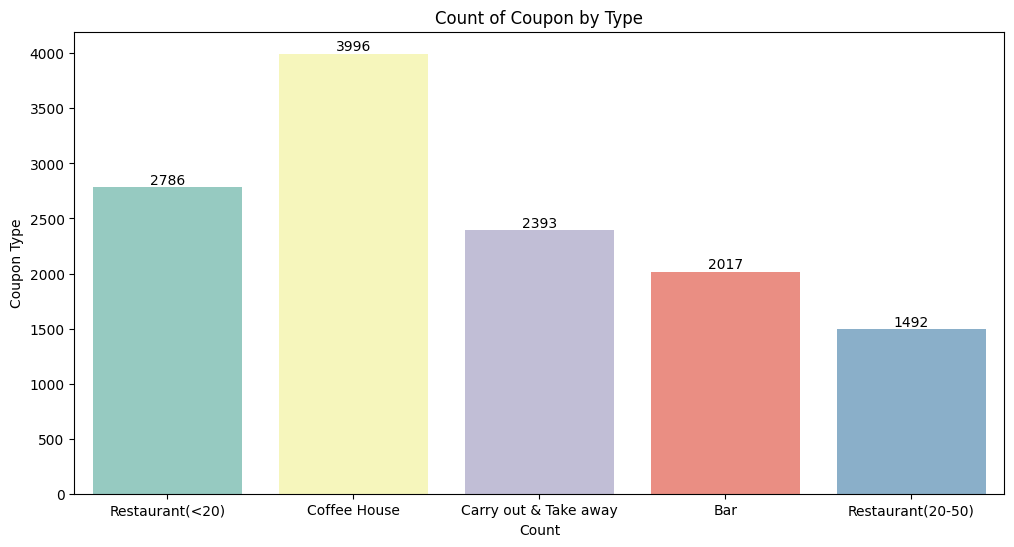

In [15]:
plt.subplots(figsize=(12, 6))
ax = sns.countplot(data, x='coupon', hue='coupon', palette='Set3', legend=False)
ax.set(title='Count of Coupon by Type', xlabel='Count', ylabel='Coupon Type')

#sns.set_theme(rc={"figure.figsize":(12, 6)})
# Annotate the bars
for label in ax.containers:
    ax.bar_label(label)

# Alternatively, we can also Seaborn's bar plot, but is a bit more cumbersome with having to index on value_counts().  For example:
#sns.barplot(x=data['coupon'].value_counts().index, y=data['coupon'].value_counts())


6. Use a histogram to visualize the temperature column.

(array([2316.,    0., 3840.,    0., 6528.]),
 array([30., 40., 50., 60., 70., 80.]),
 <BarContainer object of 5 artists>)

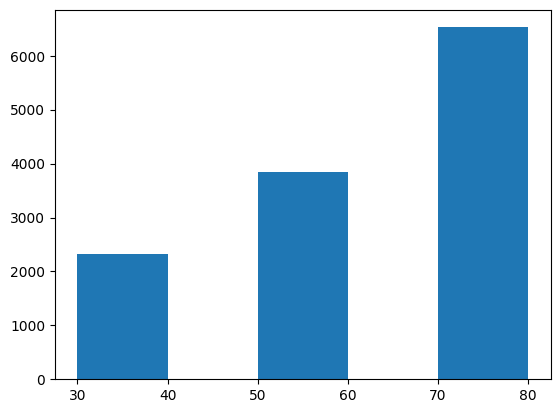

In [16]:
# Plot a histogram of the 'temperature' column.  We use 5 bins to neatly group the data for display
plt.hist(data['temperature'], bins=5)

## Analyzing Bar-related Coupons

1. Create a new `DataFrame` that contains just the bar coupons.

In [17]:
data_bar_only = data.query('coupon == "Bar"')
data_bar_only.sample(10)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12054,Home,Partner,Sunny,30,10PM,Bar,2h,Male,46,Married partner,...,never,1~3,1~3,1~3,1,1,1,0,1,0
8720,No Urgent Place,Friend(s),Rainy,55,10PM,Bar,2h,Female,31,Married partner,...,less1,gt8,4~8,less1,1,1,0,0,1,1
11912,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,below21,Single,...,less1,1~3,1~3,1~3,1,1,0,0,1,1
8920,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Male,36,Single,...,less1,less1,4~8,less1,1,0,0,0,1,0
3132,Work,Alone,Sunny,55,7AM,Bar,1d,Male,50plus,Unmarried partner,...,less1,1~3,1~3,less1,1,1,1,0,1,0
5667,Home,Alone,Sunny,80,10PM,Bar,1d,Female,31,Single,...,less1,4~8,NaN,less1,1,1,0,1,0,1
12350,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,31,Single,...,4~8,less1,4~8,1~3,1,1,0,0,1,0
2244,Work,Alone,Sunny,55,7AM,Bar,1d,Female,26,Married partner,...,less1,gt8,4~8,never,1,1,1,0,1,0
9195,Home,Alone,Rainy,55,6PM,Bar,1d,Male,21,Single,...,never,less1,less1,less1,1,1,1,0,1,1
1109,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,41,Married partner,...,less1,4~8,1~3,less1,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [18]:
data_bar_only['Y'].value_counts(normalize=True, dropna=False)

Y
0    0.589985
1    0.410015
Name: proportion, dtype: float64

A little over 41% of bar coupons were accepted.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [19]:
data_bar_only['Bar'].value_counts(dropna=False)

Bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
NaN       21
Name: count, dtype: int64

In [20]:
# Create list of conditions from 'Bar' column
bar_visits_conditions = [
    (data_bar_only['Bar'] == 'never') | (data_bar_only['Bar'] == 'less1') | (data_bar_only['Bar'] == '1~3') | data_bar_only['Bar'].isnull(),
    (data_bar_only['Bar'] == '4~8') | (data_bar_only['Bar'] == 'gt8')
]

# Create list of values to assign to the conditions
values = [
    '3 visits or less',
    '4 or more visits'
]

# Create new column 'BarVisits' and use np.select to assign values to it using our lists as arguments
data_bar_only['BarVisits'] = np.select(bar_visits_conditions, values)


/var/folders/ys/cs7c6xf95w303n3hgcygfdhw0000gp/T/ipykernel_42653/1273812052.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bar_only['BarVisits'] = np.select(bar_visits_conditions, values)


In [21]:
data_bar_only['BarVisits'].value_counts(normalize=True, dropna=False)

BarVisits
3 visits or less    0.901339
4 or more visits    0.098661
Name: proportion, dtype: float64

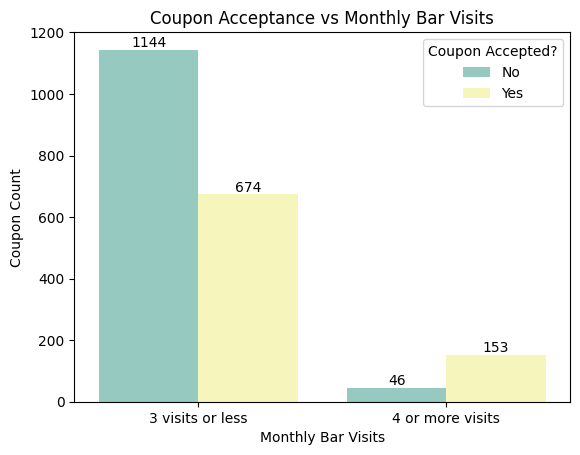

In [22]:
ax = sns.countplot(data=data_bar_only, x='BarVisits', hue='Y', palette='Set3')
plt.title('Coupon Acceptance vs Monthly Bar Visits')
plt.xlabel('Monthly Bar Visits')
plt.ylabel('Coupon Count')
plt.legend(loc='upper right', title='Coupon Accepted?', labels=['No', 'Yes'])

# Annotate the bars
for label in ax.containers:
    ax.bar_label(label)

plt.show(ax)

In [23]:
# Group data by 'BarVisits' and calculate the coupon acceptance rate for each group
data_bar_only.groupby('BarVisits')['Y'].value_counts(normalize=True, dropna=False)

BarVisits         Y
3 visits or less  0    0.629263
                  1    0.370737
4 or more visits  1    0.768844
                  0    0.231156
Name: proportion, dtype: float64

From our analysis, we can see that over 76% of those who had 4 or more monthly bar visits accepted bar coupons when one came up.  This is in contrast to only 37% acceptance for those who do not frequent bars (3 or less visits per month).

In other words, those who went to bars 4+ times a month are more than twice as likely to accept a 'Bar' coupon as those who went 3 times or less.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [24]:
data_bar_only['age'].value_counts(dropna=False)

age
21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: count, dtype: int64

In [25]:
age_over25_list = ['26', '31', '36', '41', '46', '50plus']
bar_visits_oneormore_list = ['1~3', '4~8', 'gt8']

# Create a new dataframe with only the rows where age is over 25 and the number of bar visits is 1 or more
data_over25_over1aMonth = data_bar_only.query('age in @age_over25_list and Bar in @bar_visits_oneormore_list')
data_over25_over1aMonth['Y'].value_counts(normalize=True, dropna=False)


Y
1    0.695238
0    0.304762
Name: proportion, dtype: float64

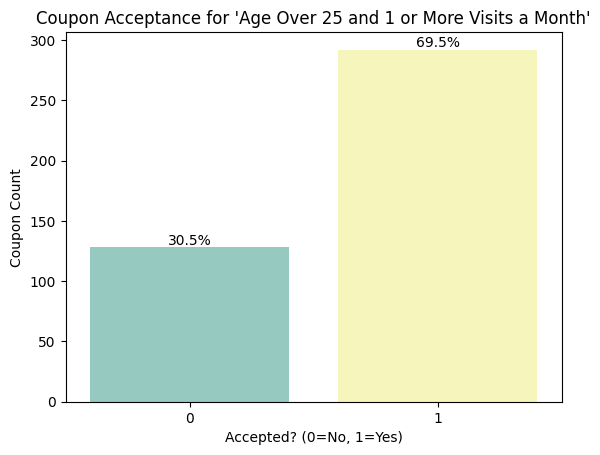

In [26]:
# Plot a countplot of the 'Y' column for the 'data_over25_over1aMonth' dataframe
ax = sns.countplot(data=data_over25_over1aMonth, x='Y', hue='Y', legend=False, palette='Set3')
plt.title('Coupon Acceptance for \'Age Over 25 and 1 or More Visits a Month\'')
plt.xlabel('Accepted? (0=No, 1=Yes)')
plt.ylabel('Coupon Count')

# Get the total count of the Y column
total = data_over25_over1aMonth['Y'].count()

# annotate the bars with percentages
for label in ax.containers:
    ax.bar_label(label, fmt=lambda x: f'{(x/total)*100:0.1f}%')

plt.show(ax)

In [27]:
data_all_others = data_bar_only.query('age not in @age_over25_list or Bar not in @bar_visits_oneormore_list')
data_all_others['Y'].value_counts(normalize=True, dropna=False)

Y
0    0.664997
1    0.335003
Name: proportion, dtype: float64

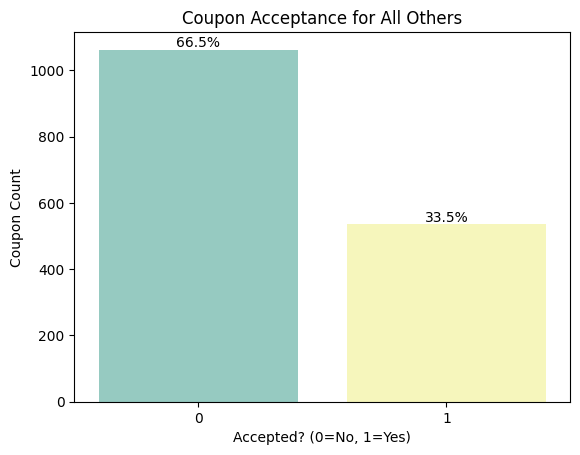

In [28]:
# Plot a countplot of the 'Y' column for the 'data_over25_over1aMonth' dataframe
ax = sns.countplot(data=data_all_others, x='Y', hue='Y', legend=False, palette='Set3')
plt.title('Coupon Acceptance for All Others')
plt.xlabel('Accepted? (0=No, 1=Yes)')
plt.ylabel('Coupon Count')

# Get the total count of the Y column
total = data_all_others['Y'].count()

# annotate the bars with percentages
for label in ax.containers:
    ax.bar_label(label, fmt=lambda x: f'{(x/total)*100:0.1f}%')

plt.show(ax)

From above, we can see that drivers over the age of 25 who also have 1 or more bar visits are more than twice as likely as others to accept the bar coupon; 69.5% vs 33.5%

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [29]:
# Dataframe for those who go to bars more than once a month and are not in the farming, fishing, and forestry occupation and do not have kids
data_five = data_bar_only.query(
    'Bar in @bar_visits_oneormore_list and\
    occupation != "Farming Fishing & Forestry" and\
    passanger != "Kid(s)"')

total_for_five = data_five['Y'].count()
data_five['Y'].value_counts(normalize=True, dropna=False)

Y
1    0.713249
0    0.286751
Name: proportion, dtype: float64

Drivers who 'go to bars more than once a month' and 'had passengers that were not a kid' and 'had occupations other than farming, fishing, or foresetry' had an acceptance rate of 71.3%.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [30]:
# Dataframe for those who go to bars more than once a month, had passengers that were not a kid, and were not widowed
data_sixA = data_bar_only.query('(Bar in @bar_visits_oneormore_list) and (passanger != "Kid(s)") and (maritalStatus !="Widowed")')

total_for_sixA = data_sixA['Y'].count()
data_sixA['Y'].value_counts(normalize=True)

Y
1    0.713249
0    0.286751
Name: proportion, dtype: float64

Those _who go to bars more than once a month, had passengers that were not a kid, and were not widowed_ had a 71.3% bar coupon acceptance rate.

In [31]:
data['age'].value_counts(dropna=False)

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [32]:
# Dataframe for those who go to bars more than once a month and are under the age of 30
under_age_30_list = ['below21', '21', '26']
data_sixB = data_bar_only.query('Bar in @bar_visits_oneormore_list and age in @under_age_30_list')

total_for_sixB = data_sixB['Y'].count()
data_sixB['Y'].value_counts(normalize=True)

Y
1    0.721739
0    0.278261
Name: proportion, dtype: float64

Those who _go to bars more than once a month and are under the age of 30_ had a 72.17% bar coupon acceptance rate.

In [33]:
data['RestaurantLessThan20'].value_counts(dropna=False)

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
NaN       130
Name: count, dtype: int64

In [34]:
data['income'].value_counts(dropna=False)

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

In [35]:
# Dataframe for those who go to cheap restaurants more than 4 times a month and income is less than 50K
cheap_restaurant_4ormore_list = ['4~8', 'gt8']
income_less_than_50k_list = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
data_sixC = data_bar_only.query('RestaurantLessThan20 in @cheap_restaurant_4ormore_list and income in @income_less_than_50k_list')

total_for_sixC = data_sixC['Y'].count()
data_sixC['Y'].value_counts(normalize=True)


Y
0    0.546512
1    0.453488
Name: proportion, dtype: float64

Those who _go to cheap restaurants more than 4 times a month and income is less than 50K_ had a 54.65% bar coupon acceptance rate.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Text(0.5, 0.98, 'Coupon Acceptance for Those Who...')

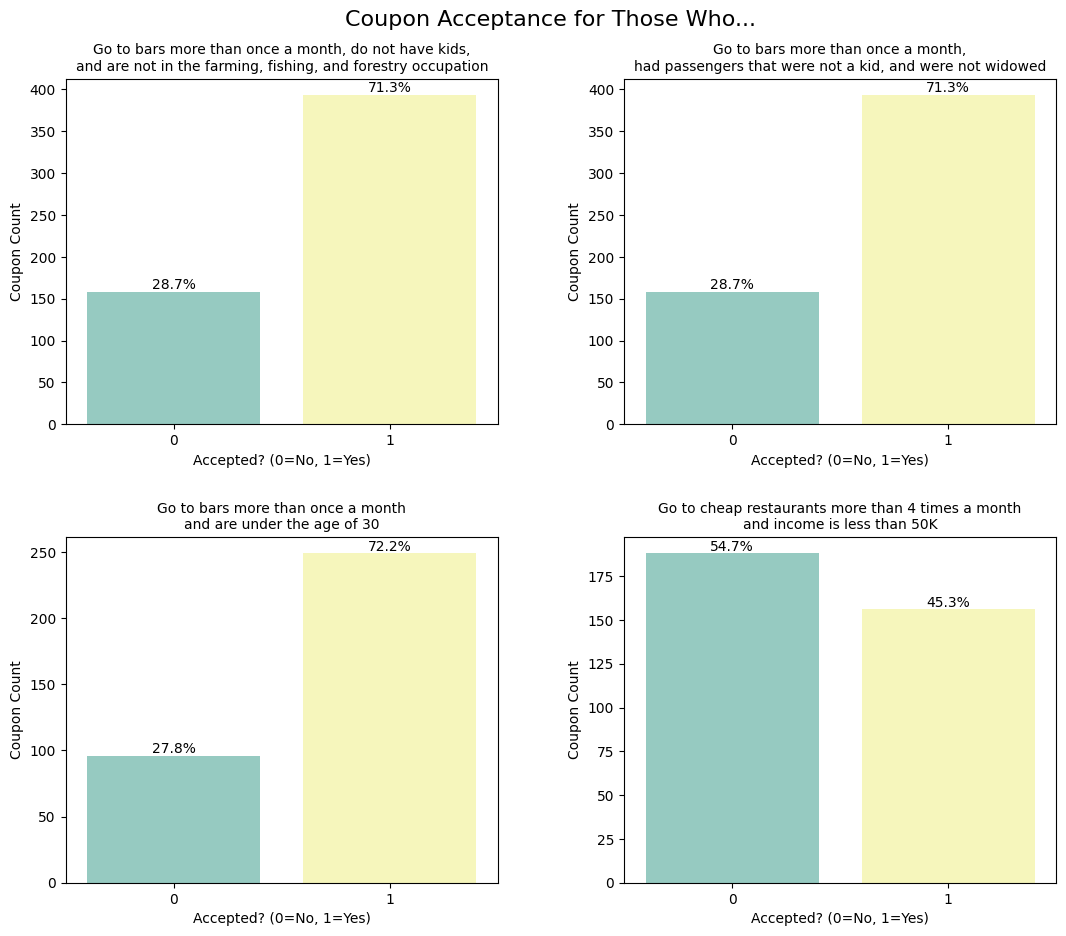

In [36]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2)

# set figure size [15, 8]
fig.set_figheight(10)
fig.set_figwidth(12)
fig.tight_layout(pad=6.0)

### Upper Left Quadrant ###
sns.countplot(data=data_five, x='Y', hue='Y', palette='Set3', legend=False, ax=axes[0,0]).set( 
    xlabel='Accepted? (0=No, 1=Yes)', 
    ylabel='Coupon Count')
axes[0,0].set_title('Go to bars more than once a month, do not have kids,\nand are not in the farming, fishing, and forestry occupation',
                    fontsize=10)

# annotate the upper left plot with percentages
for label in axes[0,0].containers:
    axes[0,0].bar_label(label, fmt=lambda x: f'{(x/total_for_five)*100:0.1f}%')

### Upper Right Quadrant ###
sns.countplot(data=data_sixA, x='Y', hue='Y', palette='Set3', legend=False, ax=axes[0,1]).set(
    xlabel='Accepted? (0=No, 1=Yes)', 
    ylabel='Coupon Count')
axes[0,1].set_title('Go to bars more than once a month,\nhad passengers that were not a kid, and were not widowed',
                    fontsize=10)

# annotate the upper right plot with percentages
for label in axes[0,1].containers:
    axes[0,1].bar_label(label, fmt=lambda x: f'{(x/total_for_sixA)*100:0.1f}%')

### Lower Left Quadrant ###
sns.countplot(data=data_sixB, x='Y', hue='Y', palette='Set3', legend=False, ax=axes[1,0]).set(
    xlabel='Accepted? (0=No, 1=Yes)', 
    ylabel='Coupon Count')
axes[1,0].set_title('Go to bars more than once a month\nand are under the age of 30',
                    fontsize=10)

# annotate the lower left plot with percentages
for label in axes[1,0].containers:
    axes[1,0].bar_label(label, fmt=lambda x: f'{(x/total_for_sixB)*100:0.1f}%')

### Lower Right Quadrant ###
sns.countplot(data=data_sixC, x='Y', hue='Y', palette='Set3', legend=False, ax=axes[1,1]).set(
    xlabel='Accepted? (0=No, 1=Yes)', 
    ylabel='Coupon Count')
axes[1,1].set_title('Go to cheap restaurants more than 4 times a month\nand income is less than 50K',
                    fontsize=10)

# annotate the lower right plot with percentages
for label in axes[1,1].containers:
    axes[1,1].bar_label(label, fmt=lambda x: f'{(x/total_for_sixC)*100:0.1f}%')

plt.suptitle("Coupon Acceptance for Those Who...", fontsize=16)

Text(0, 0.5, 'Coupon Count')

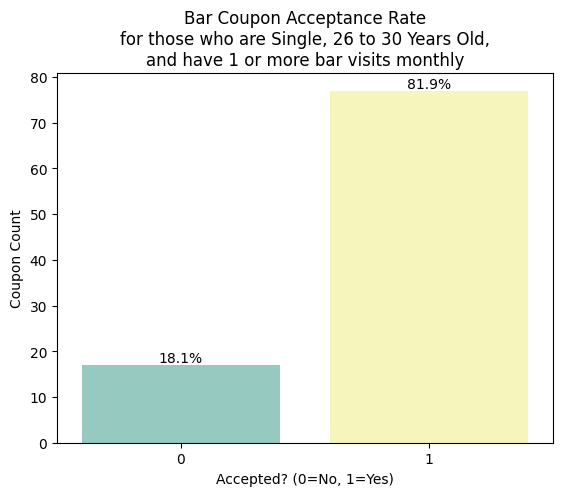

In [37]:
bar_final_df = data_bar_only.query('maritalStatus == "Single" and age == "26" and Bar in @bar_visits_oneormore_list')

# Plot a countplot of the 'Y' column of foo
ax = sns.countplot(data=bar_final_df, x='Y', hue='Y', legend=False, palette='Set3')

# Show percentages on the bars
total = bar_final_df['Y'].count()
for label in ax.containers:
    ax.bar_label(label, fmt=lambda x: f'{(x/total)*100:0.1f}%')

plt.title('Bar Coupon Acceptance Rate\nfor those who are Single, 26 to 30 Years Old,\nand have 1 or more bar visits monthly')
plt.xlabel('Accepted? (0=No, 1=Yes)')
plt.ylabel('Coupon Count')

    

## Analyzing Coupon Acceptance for Cheap Resturants (i.e. those under $20) 

In [38]:
# Create a new dataframe with only the rows where the coupon is for a cheap restaurant
data_cheap_restaurants_only = data.query('coupon == "Restaurant(<20)"')
data_cheap_restaurants_only

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
10,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
11,No Urgent Place,Kid(s),Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12666,No Urgent Place,Friend(s),Snowy,30,2PM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12668,No Urgent Place,Alone,Sunny,80,10AM,Restaurant(<20),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12671,No Urgent Place,Partner,Snowy,30,10AM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12677,Home,Partner,Sunny,30,6PM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,1


In [39]:
# Let's look at the coupon acceptance rate across the entire cheap restaurant sample
data_cheap_restaurants_only['Y'].value_counts(normalize=True, dropna=False)

Y
1    0.707107
0    0.292893
Name: proportion, dtype: float64

In [40]:
data_cheap_restaurants_only['RestaurantLessThan20'].value_counts(dropna=False)

RestaurantLessThan20
1~3      1157
4~8       800
less1     460
gt8       288
never      54
NaN        27
Name: count, dtype: int64

In [41]:
# Group data_cheap_restaurants_only by 'gender' and calculate the average age
data_cheap_restaurants_only.groupby('gender')[['Y']].value_counts(normalize=True, dropna=False)


gender  Y
Female  1    0.696692
        0    0.303308
Male    1    0.717949
        0    0.282051
Name: proportion, dtype: float64

Male and female drivers have similar coupon acceptance rates.

In [42]:
data_cheap_restaurants_only.groupby(['destination'])[['Y']].value_counts(normalize=True, dropna=False)

destination      Y
Home             1    0.555332
                 0    0.444668
No Urgent Place  1    0.792541
                 0    0.207459
Work             1    0.582897
                 0    0.417103
Name: proportion, dtype: float64

Drivers who have no urgent place to go are much more likely to accept a coupon.

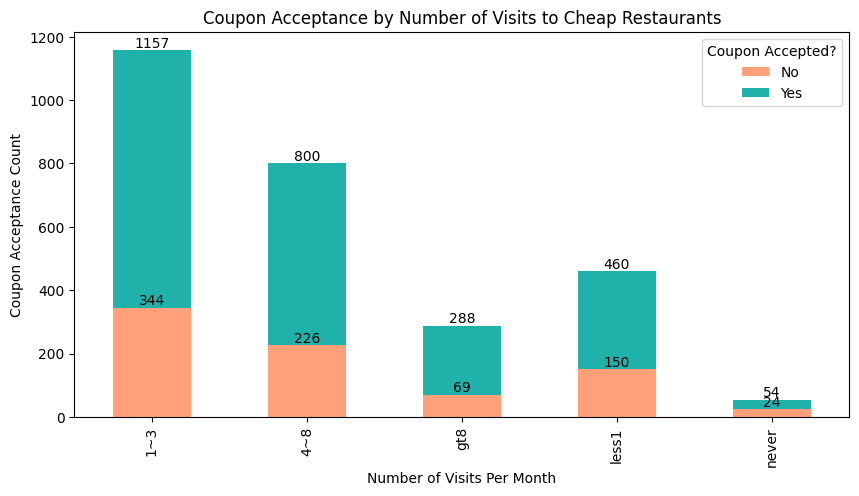

In [43]:
# Use data_cheap_restaurants_only to group by 'RestaurantLessThan20' and count number of 'Y=1' and 'Y=0' for each group
coupon_acceptance_by_visits = data_cheap_restaurants_only.groupby('RestaurantLessThan20')['Y'].value_counts(dropna=False)

# Create a bar chart for the coupon acceptance by number of visits to cheap restaurants
ax = coupon_acceptance_by_visits.unstack().plot(kind='bar', stacked=True, color=['#FFA07A', '#20B2AA'], figsize=(10, 5))
plt.title('Coupon Acceptance by Number of Visits to Cheap Restaurants')
plt.xlabel('Number of Visits Per Month')
plt.ylabel('Coupon Acceptance Count')
plt.legend(loc='upper right', title='Coupon Accepted?', labels=['No', 'Yes'])

# Annotate the bars with counts
for label in ax.containers:
    ax.bar_label(label)

# Make the y-axis percentages
#plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
#plt.show(ax)



In [44]:
data_cheap_restaurants_only.groupby('RestaurantLessThan20')['Y'].value_counts(normalize=True, dropna=False)

RestaurantLessThan20  Y
1~3                   1    0.702679
                      0    0.297321
4~8                   1    0.717500
                      0    0.282500
gt8                   1    0.760417
                      0    0.239583
less1                 1    0.673913
                      0    0.326087
never                 1    0.555556
                      0    0.444444
Name: proportion, dtype: float64

There is >70% coupon acceptance rate for those who visits cheap restaurants one or more times a month.

In [45]:
# Let's group the data by various features and count the number of coupon acceptances
grouped_cheap_restaurants = data_cheap_restaurants_only.groupby(
    ['RestaurantLessThan20','gender','age','maritalStatus'])['Y'].value_counts(dropna=False)

# Convert the grouped data to a dataframe and rename the columns
df_grouped_cheap_restaurants = grouped_cheap_restaurants.unstack()
df_gcr = df_grouped_cheap_restaurants.reset_index().rename_axis((None), axis=1)
df_gcr = df_gcr.rename(columns={0: 'No', 1: 'Yes'})

# Calculate the total number of samples and the percentage of 'No' and 'Yes' for each group
df_gcr['TotalSamples'] = df_gcr['No'] + df_gcr['Yes']
df_gcr['No%'] = df_gcr['No'] / df_gcr['TotalSamples'] * 100
df_gcr['No%'] = df_gcr['No%'].apply(lambda x: float("{:.2f}".format(x)))
df_gcr['Yes%'] = df_gcr['Yes'] / df_gcr['TotalSamples'] * 100
df_gcr['Yes%'] = df_gcr['Yes%'].apply(lambda x: float("{:.2f}".format(x)))

df_gcr.sample(5)

,RestaurantLessThan20,gender,age,maritalStatus,No,Yes,TotalSamples,No%,Yes%
81,4~8,Male,36,Married partner,3.0,16.0,19.0,15.79,84.21
107,gt8,Male,21,Single,3.0,14.0,17.0,17.65,82.35
151,less1,Male,50plus,Married partner,2.0,4.0,6.0,33.33,66.67
85,4~8,Male,46,Married partner,7.0,7.0,14.0,50.00,50.00
120,less1,Female,21,Single,6.0,3.0,9.0,66.67,33.33


In [46]:
# Query df_gcr for the rows where 'Yes%' is >= 85
df_gcr.query('`Yes%` >= 85')

,RestaurantLessThan20,gender,age,maritalStatus,No,Yes,TotalSamples,No%,Yes%
14,1~3,Female,41,Single,1.0,6.0,7.0,14.29,85.71
42,1~3,Male,46,Single,1.0,7.0,8.0,12.50,87.50
45,1~3,Male,50plus,Single,1.0,9.0,10.0,10.00,90.00
65,4~8,Female,46,Single,1.0,7.0,8.0,12.50,87.50
70,4~8,Female,below21,Single,3.0,18.0,21.0,14.29,85.71
71,4~8,Female,below21,Unmarried partner,2.0,13.0,15.0,13.33,86.67
73,4~8,Male,21,Single,6.0,40.0,46.0,13.04,86.96
84,4~8,Male,41,Single,1.0,9.0,10.0,10.00,90.00
92,gt8,Female,21,Single,2.0,17.0,19.0,10.53,89.47
104,gt8,Female,50plus,Married partner,1.0,9.0,10.0,10.00,90.00


From the above tabulations, we can precisely see which driver groups have over 85% coupon acceptance rate.

In [47]:
# Let's look at only those groups where we have at least 15 samples
df_gcr.query('`Yes%` >= 85 and `TotalSamples` >= 15')

,RestaurantLessThan20,gender,age,maritalStatus,No,Yes,TotalSamples,No%,Yes%
70,4~8,Female,below21,Single,3.0,18.0,21.0,14.29,85.71
71,4~8,Female,below21,Unmarried partner,2.0,13.0,15.0,13.33,86.67
73,4~8,Male,21,Single,6.0,40.0,46.0,13.04,86.96
92,gt8,Female,21,Single,2.0,17.0,19.0,10.53,89.47
140,less1,Male,26,Single,2.0,27.0,29.0,6.90,93.10


Text(0, 0.5, 'Coupon Count')

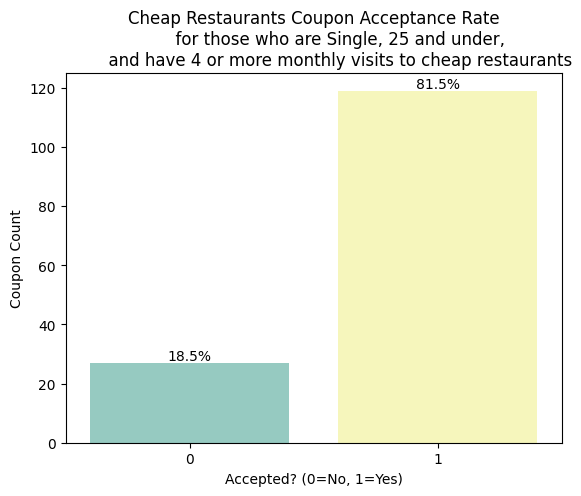

In [48]:
cheap_restaurants_filtered_age_list = ['below21', '21']
cheap_restaurants_filtered_visits_list = ['4~8', 'gt8']

cheap_restaurants_last_df = data_cheap_restaurants_only.query(
    'maritalStatus == "Single" and\
    age in @cheap_restaurants_filtered_age_list and\
    RestaurantLessThan20 in @cheap_restaurants_filtered_visits_list')

# Plot a countplot of the 'Y' column for the 'cheap_restaurants_last_df' dataframe
ax = sns.countplot(data=cheap_restaurants_last_df, x='Y', hue='Y', legend=False, palette='Set3')

# Show percentages on the bars
total = cheap_restaurants_last_df['Y'].count()
for label in ax.containers:
    ax.bar_label(label, fmt=lambda x: f'{(x/total)*100:0.1f}%')

plt.title('Cheap Restaurants Coupon Acceptance Rate\n\
          for those who are Single, 25 and under,\n\
          and have 4 or more monthly visits to cheap restaurants')
plt.xlabel('Accepted? (0=No, 1=Yes)')
plt.ylabel('Coupon Count')


In [49]:
df_gcr.sort_values(by='Yes%', ascending=True).head(10)

,RestaurantLessThan20,gender,age,maritalStatus,No,Yes,TotalSamples,No%,Yes%
106,gt8,Female,below21,Unmarried partner,5.0,1.0,6.0,83.33,16.67
100,gt8,Female,36,Divorced,9.0,2.0,11.0,81.82,18.18
160,never,Male,26,Unmarried partner,9.0,3.0,12.0,75.00,25.00
120,less1,Female,21,Single,6.0,3.0,9.0,66.67,33.33
155,never,Female,21,Single,7.0,4.0,11.0,63.64,36.36
131,less1,Female,41,Married partner,5.0,3.0,8.0,62.50,37.50
19,1~3,Female,50plus,Divorced,13.0,8.0,21.0,61.90,38.10
22,1~3,Female,50plus,Unmarried partner,6.0,4.0,10.0,60.00,40.00
63,4~8,Female,41,Single,3.0,2.0,5.0,60.00,40.00
152,less1,Male,50plus,Widowed,3.0,2.0,5.0,60.00,40.00


It's also interesting to observe driver groups that have less than 50% coupon acceptance rates.

In [50]:
df_gcr.query('`Yes%` < 50')

,RestaurantLessThan20,gender,age,maritalStatus,No,Yes,TotalSamples,No%,Yes%
19,1~3,Female,50plus,Divorced,13.0,8.0,21.0,61.90,38.10
22,1~3,Female,50plus,Unmarried partner,6.0,4.0,10.0,60.00,40.00
46,1~3,Male,50plus,Unmarried partner,6.0,5.0,11.0,54.55,45.45
61,4~8,Female,36,Single,4.0,3.0,7.0,57.14,42.86
63,4~8,Female,41,Single,3.0,2.0,5.0,60.00,40.00
100,gt8,Female,36,Divorced,9.0,2.0,11.0,81.82,18.18
106,gt8,Female,below21,Unmarried partner,5.0,1.0,6.0,83.33,16.67
120,less1,Female,21,Single,6.0,3.0,9.0,66.67,33.33
122,less1,Female,26,Married partner,8.0,6.0,14.0,57.14,42.86
129,less1,Female,36,Married partner,17.0,15.0,32.0,53.12,46.88
